# Least square problem for polynomial regression 

## import library

In [484]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

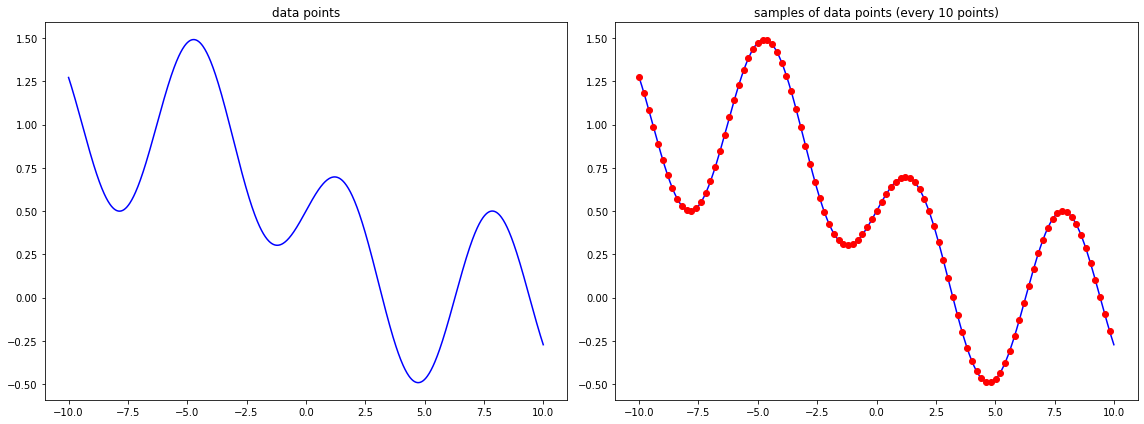

In [485]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       # 10개 마다 하나 씩 보여줌 
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [486]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # input: p (x의 0승 부터 p-1승 까지), 매트릭스 A 구하기

    for i in range(p):
        A[:, i] = np.power(x,i)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A

#x = np.arange(0,3)
#p = 3
#x1 = np.shape(5,5)
#print(x) # 그냥 나열
#print(construct_matrix_A(x, p)) # 행렬로 나열

## construct vector $b$

In [509]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # b: n행 1열
    # 주어진 x,y에 대해, y벡터 = b

    for i in range(n):
        b[i,0] = y[i];
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b

#y = np.arange(0,3)
#b = y
#print(b)

## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [510]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # objective 함수가 최소가 되는 z 구하기 
    # loss = (Az - b)^2 / 2n 
    
    A = construct_matrix_A(x, p)
    b = construct_vector_b(y)

    ATA     = np.matmul(A.T, A)
    ATb     = np.matmul(A.T, y)
    invATA  = np.linalg.inv(ATA) # 역행렬
    z   = np.matmul(invATA, ATb)
    
    #print(z)

    AZ = np.matmul(A, z) # Az
    loss2 = AZ - b # Az - b
    #loss3 = np.matmul(loss2, loss2) # 제곱
    #loss = np.sum(loss3) / (2 * n)

    n = len(x)
    loss = np.sum(np.matmul(Az_b.T, loss2)) / (2 * n)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss



- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [511]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # regular 값이 포함되었을 때(alhpa 추가)
    
    I       = np.identity(p)
    A       = construct_matrix_A(x, p) # A
    b       = construct_vector_b(y) # b

    ATA     = np.matmul(A.T, A)
    ATb     = np.matmul(A.T, b)

    n = len(x)
    n2 = n * alpha * I
    invATA  = np.linalg.inv(ATA + n2) # 역행렬
    z   = np.matmul(invATA, ATb)

    AZ = np.matmul(A, z) 
    h1 = AZ - b # Az - b
    h2 = np.sum(np.matmul(Az_b.T, Az_b)) # 제곱합
    h3 = h3 / (2 * n)

    j1 = np.sum(np.matmul(z.T, z)) # 제곱합
    j2 = (j1 * alpha) / 2

    loss = h3 + j2
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [512]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # f(세타, x) : f_hat 구하기 : y_hat
    z, loss = solve_regression(x, y, p) # 앞 함수에서 값 가져오기

    A = construct_matrix_A(x, p)
    y_hat = np.matmul(A, z)

    loss = z[1]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [491]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # regular 포함

    A = construct_matrix_A(x, p)

    z = solve_regression_with_regularization(x, y, p, alpha)
    
    loss = z[1]
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [492]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [493]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [494]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [495]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [496]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [497]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [498]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [499]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [500]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [501]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [502]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [503]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [504]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [505]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [506]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


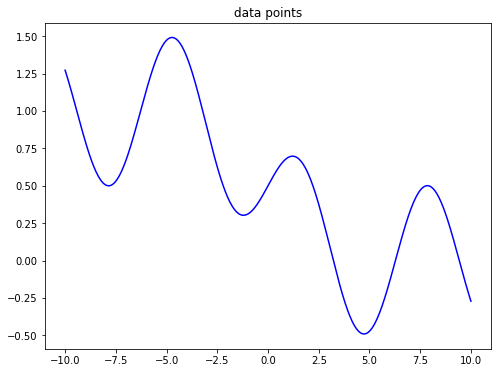

**************************************************
## [RESULT 02]
**************************************************


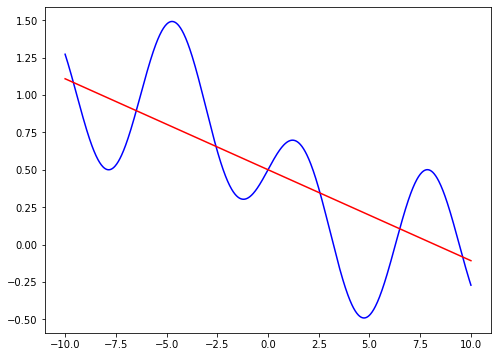

**************************************************
## [RESULT 03]
**************************************************


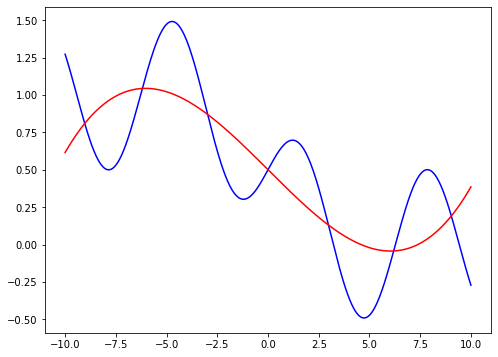

**************************************************
## [RESULT 04]
**************************************************


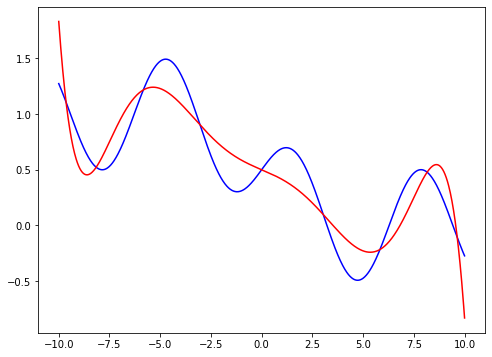

**************************************************
## [RESULT 05]
**************************************************


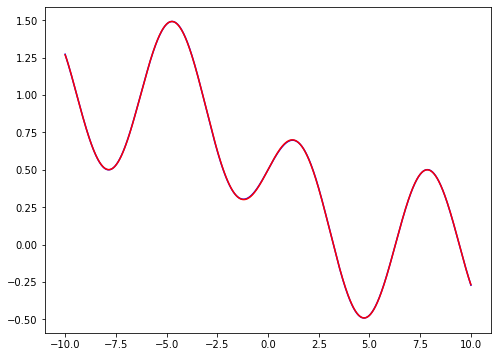

**************************************************
## [RESULT 06]
**************************************************


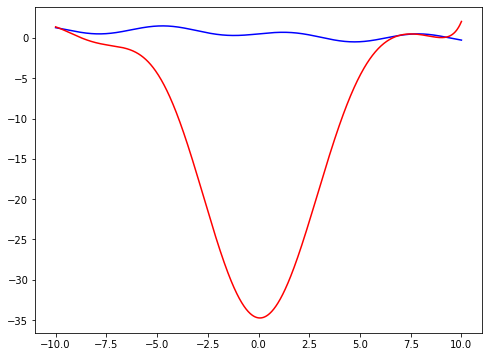

**************************************************
## [RESULT 07]
**************************************************


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [507]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)